# Introduction to Statistics in Python


In [1]:
# Importing numpy and pandas
import numpy as np
import pandas as pd

# Importing the course datasets
amir_deals = pd.read_csv("datasets/amir_deals.csv")
world_happiness = pd.read_csv("datasets/world_happiness.csv")
food_consumption = pd.read_csv("datasets/food_consumption.csv")

## Chapter 1 Summary Statistics

### Mean and median

In [5]:
# Import numpy as np
import numpy as np

# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country']=='Belgium') | (food_consumption['country']== 'USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg(['mean', 'median']))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


### Calculando percentiles con linspace

In [6]:
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption["co2_emission"], np.linspace(0,1,11)))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


### Percentiles forma alternativa

In [7]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption["co2_emission"], [0, 0.25, 0.5, 0.75, 1]))

[   0.        5.21     16.53     62.5975 1712.    ]


### Variance and standard deviation

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


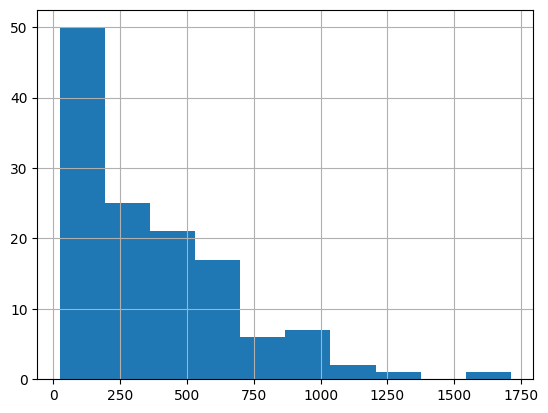

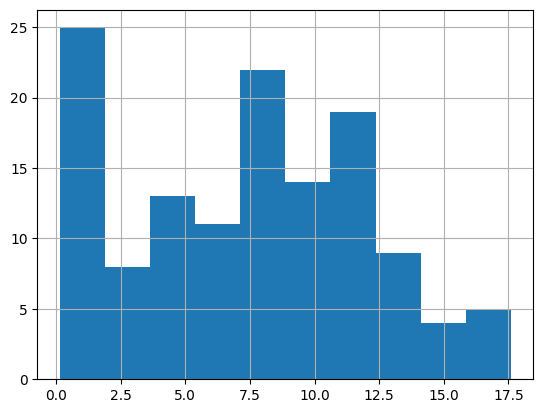

In [2]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
# Show plot
plt.show()

### Outliers an IQR

In [3]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


## Chapter 2 Number numbers and probability

### Probability Distribution

In [0]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = groups_4_or_more['prob'].sum()
print(prob_4_or_more)

### Probability to wait more than 5 minutes

In [5]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = uniform.cdf(30,0,30) -uniform.cdf(5,0,30)
print(prob_greater_than_5)

0.8333333333333334


 ### Probabilidad para esperar entre 10-20 minutos
 

In [6]:

# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20,0,30) -uniform.cdf(10,0,30)
print(prob_between_10_and_20)

0.3333333333333333


### Seed, uniform.rvs

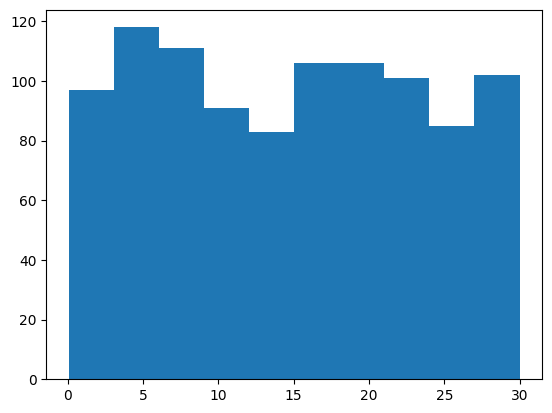

In [7]:

# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

### Probabiity with binom

In [11]:
import scipy.stats
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3,3, 0.3)

print(prob_3)

# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1,3,0.3)

print(prob_less_than_or_equal_1)

# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)

print(prob_greater_than_1)

0.026999999999999996
0.784
0.21599999999999997


### Simulating sales 

In [12]:

# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)

# Print mean deals won per week
print(np.mean(deals))

0.8269230769230769


## Chapter 3 More Distributions and the Central Limit Theorem

### Probabilities from normal distribuition

In [15]:
from scipy.stats import norm

# Probability of deal > 1000
prob_over_1000 = 1-norm.cdf(1000, 5000, 2000)
print(prob_over_1000)

# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)
print(prob_less_7500)

# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)
print(prob_3000_to_7000)

# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)

print(pct_25)



0.9772498680518208
0.8943502263331446
0.6826894921370859
3651.0204996078364


### Calculando aumento de std y mean 

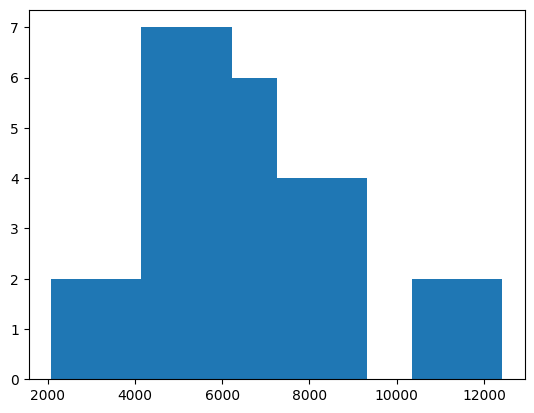

In [16]:
# Calculate new average amount
from scipy.stats import norm
new_mean = 5000 * 1.2 

# Calculate new standard deviation
new_sd = 2000 * 1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

### Samples, seed, histogram, append


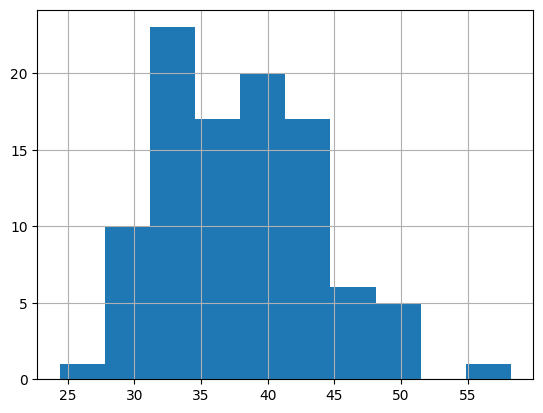

In [17]:
# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

### Loop with samples

In [0]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = all_deals['num_users'].sample(20, replace=True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals["num_users"]))

### Poisson

In [19]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5,4)

print(prob_5)

# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_coworker = poisson.pmf(5, 5.5)

print(prob_coworker)

# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of > 10 responses
prob_over_10 = 1- poisson.cdf(10, 4)

print(prob_over_10)

0.1562934518505317
0.17140068409793663
0.0028397661205137315


### Expon TIEMPO DE DURACIÓN

In [20]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes > 4 hours
print(1- expon.cdf(4, scale=2.5))

# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes 3-4 hours
print(expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5))

0.3296799539643607
0.20189651799465536
0.09929769391754684


## Chapter 4 Correlation and Experimental Design

### Scatterplot with trend line

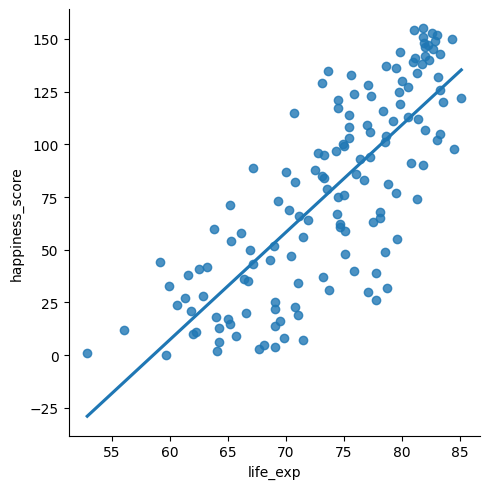

0.7802249053272062


In [22]:
import seaborn as sns
# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x="life_exp", y= "happiness_score", data= world_happiness, ci=None)

# Show plot
plt.show()

# Correlation between life_exp and happiness_score
cor = world_happiness["life_exp"].corr(world_happiness["happiness_score"])

print(cor)